In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



In [14]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3126,9754-CLVZW,Female,0,Yes,Yes,26,No,No phone service,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),38.85,1025.15,No
6994,0804-YGEQV,Female,0,Yes,Yes,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.45,993.15,No
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
4796,3807-BPOMJ,Female,0,Yes,No,55,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,94.75,5276.1,No
2435,9481-SFCQY,Female,0,No,Yes,14,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.80,824.85,No
4597,3440-JPSCL,Female,0,No,No,6,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.95,547.65,Yes
3985,7130-CTCUS,Male,1,Yes,No,16,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.55,825.1,No
6792,4597-ELFTS,Male,0,No,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1334,Yes
2163,4021-RQSNY,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,3004.15,Yes
4055,4676-WLUHT,Male,0,No,No,54,No,No phone service,DSL,Yes,...,No,No,No,Yes,Two year,No,Bank transfer (automatic),46.20,2431.95,No


In [15]:
df = df.drop('customerID', axis ='columns')


In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [22]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [57]:
df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [58]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17544\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [59]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [79]:
tenure_churn_no =df1[df1.Churn == 'No'].tenure
tenure_churn_yes =df1[df1.Churn == 'Yes'].tenure

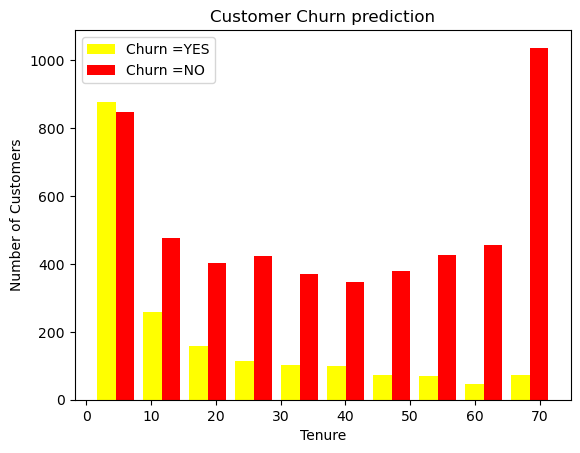

In [83]:
plt.hist([tenure_churn_yes,tenure_churn_no],color = ['yellow','red'],label = ['Churn =YES','Churn =NO'])

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction')


plt.legend()

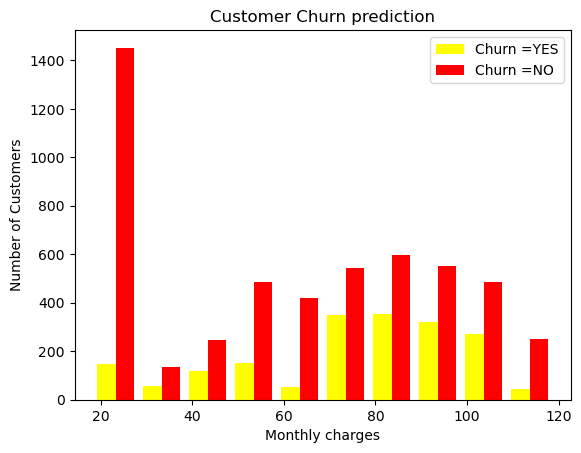

In [85]:
mc_churn_no =df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes =df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no],color = ['yellow','red'],label = ['Churn =YES','Churn =NO'])

plt.xlabel('Monthly charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction')



plt.legend()

In [89]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object' :
            print(f'{column} : {df[column].unique()}')

In [90]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [92]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17544\477714218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17544\477714218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [93]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [115]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17544\4027547381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [118]:
df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17544\3292495191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)


In [119]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [123]:
df2 = pd.get_dummies(data=df1, columns = ['InternetService','Contract','PaymentMethod'])

df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4280,0,0,1,1,64,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3720,1,0,0,0,42,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
374,0,0,0,0,37,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
574,1,1,1,0,28,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2683,1,0,0,0,7,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [126]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [133]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [136]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [140]:
x = df2.drop('Churn', axis= 'columns')
y = df2['Churn']

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 5)

In [142]:
x_train.shape

(5625, 26)

In [143]:
x_test.shape

(1407, 26)

In [150]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation ='relu'),
    keras.layers.Dense(1, activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6984 - loss: 0.6911
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7384 - loss: 0.6513
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.7428 - loss: 0.6256
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7455 - loss: 0.6062
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.7370 - loss: 0.5978
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7594 - loss: 0.5715
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8050 - loss: 0.5166
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8037 - loss: 0.5036
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.4822
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8107 - loss: 0.4710
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8216 - loss: 0.4567
Epoch 12/100
176/176 ━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8203 - loss: 0.3888
Epoch 68/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.8159 - loss: 0.3933
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8229 - loss: 0.3962
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8257 - loss: 0.3864
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8178 - loss: 0.3889
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8213 - loss: 0.3929
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8185 - loss: 0.3895
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8259 - loss: 0.3887
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.3834
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8194 - loss: 0.3897
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8233 - loss: 0.3835  
Epoch 78/100
176/176 ━━━━━━━━━━

In [163]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.7675 - loss: 0.5191
Test Accuracy: 75.91%


In [164]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7675 - loss: 0.5191


[0.5362269282341003, 0.7590618133544922]

In [166]:
y_p = model.predict(x_test)
y_p[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.10722722],
       [0.68322164],
       [0.02062996],
       [0.930995  ],
       [0.33504665],
       [0.9266013 ],
       [0.02722255],
       [0.3061367 ],
       [0.363617  ],
       [0.45326957]], dtype=float32)

In [168]:
y_pred = []
for element in y_p:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [169]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [171]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       999
           1       0.59      0.53      0.56       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.75      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

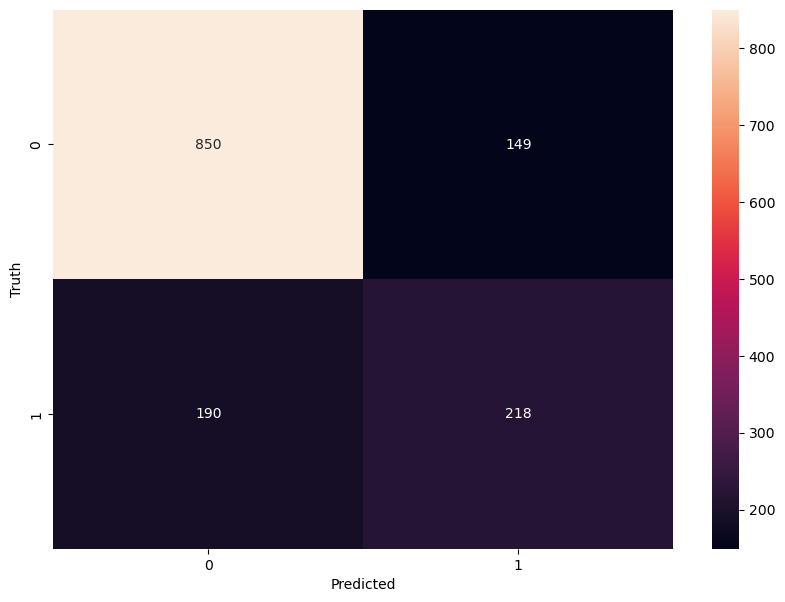

In [174]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')